In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read the file
data = pd.read_csv("/Users/sandeepreddy/Desktop/Akka/apple_quality.csv")  # "\t" is used because your data is tab-separated

num_rows, num_columns = data.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

The DataFrame has 4001 rows and 9 columns.


In [31]:
# Data Cleaning Process:
data1 = data.dropna()
num_rows, num_columns = data1.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns")

# Droping columns if there are empty:
data1.dropna(subset=['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity'], inplace = True)
num_rows, num_columns = data1.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

The DataFrame has 4000 rows and 10 columns
The DataFrame has 4000 rows and 10 columns.


/var/folders/2n/w1ry85d92pqdvdsyt_mzvfc00000gn/T/ipykernel_94857/3964895418.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(subset=['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity'], inplace = True)


In [34]:
# checking if there are any data duplication:
print(data1.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Length: 4000, dtype: bool


In [35]:
# first 10 records
print(data1.head(20))

    A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4    4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
5    5.0 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616   
6    6.0  1.331606  1.635956   0.875974    -1.677798   3.106344 -1.847417   
7    7.0 -1.995462 -0.428958   1.530644    -0.742972   0.158834  0.974438   
8    8.0 -3.867632 -3.734514   0.986429    -1.207655   2.292873  4.080921   
9    9.0 -0.727983 -0.442820  -4.092223     0.597513   0.393714  1.620857   
10  10.0 -2.699336 -1.329507  -1.418507    -0.625546   2.371074  3.403165   
11  11.0  2.450960 -0.564177  -1.635041     0.942400  -2.087317  1.214322   

In [36]:
# Last 10 records
print(data1.tail(10))

        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3990  3990.0 -1.396794 -0.599596  -1.931104     1.815668   1.670732  1.614027   
3991  3991.0 -4.007762  2.970164   0.218167    -0.492369   1.656375 -2.133895   
3992  3992.0  1.764253 -2.079695  -0.083383    -0.086724  -1.703385  3.840101   
3993  3993.0  1.520142 -0.352623  -3.206467     1.341719   0.675568  0.107093   
3994  3994.0  1.482508 -2.581181  -0.306888     1.527877   1.056361  2.560829   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality   Color  
3990 -0.987968     bad   green  
3991 -4.431321    good     red  
3992 -0.3

In [37]:
frequency_Quality = data1['Quality'].value_counts()
print(frequency_Quality)

good    2004
bad     1996
Name: Quality, dtype: int64


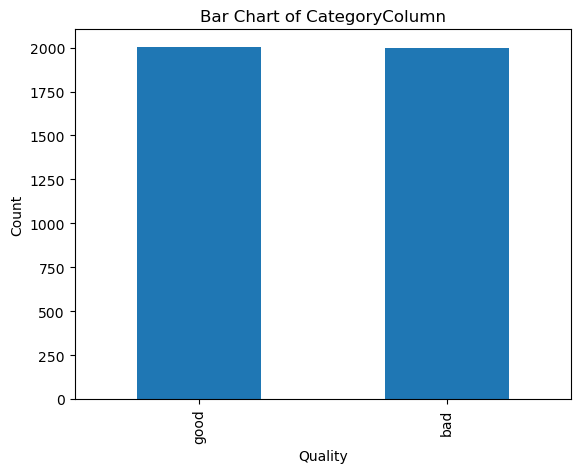

In [38]:
#  Plotting
frequency_Quality.plot(kind='bar')
plt.title('Bar Chart of CategoryColumn')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

/var/folders/2n/w1ry85d92pqdvdsyt_mzvfc00000gn/T/ipykernel_94857/1200272649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Color'] = 'green'  # Default color


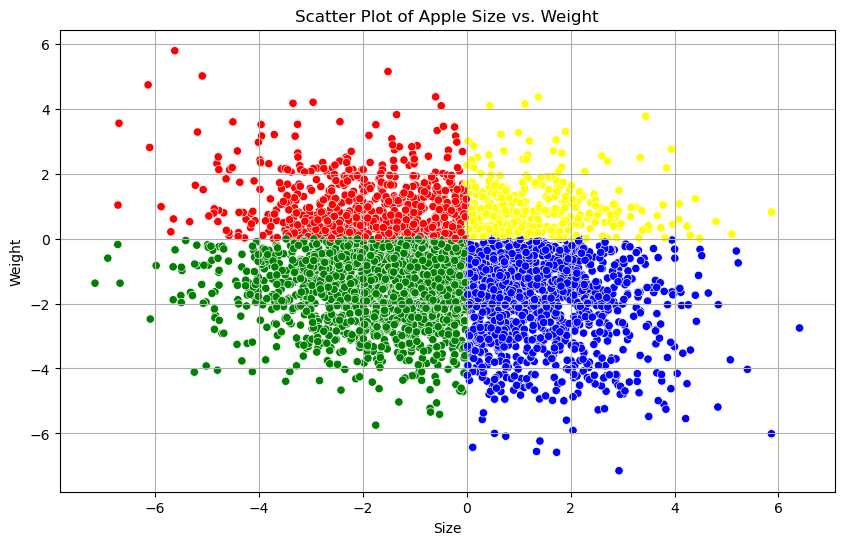

green     1736
yellow    1234
red        665
blue       365
Name: Color, dtype: int64


In [39]:
data1['Color'] = 'green'  # Default color
data1.loc[(data['Size'] > 0) & (data1['Weight'] > 0), 'Color'] = 'blue'
data1.loc[(data['Size']>0) & (data1['Weight'] < 0), 'Color'] = 'yellow'
data1.loc[(data['Size']<0) & (data1['Weight'] > 0), 'Color'] = 'red'

# Scatter plot with conditional colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Weight', data=data1, hue='Color', palette=['green', 'blue', 'yellow','red'], legend=False)
plt.title('Scatter Plot of Apple Size vs. Weight')
plt.xlabel('Size')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

color_counts = data1['Color'].value_counts()
print(color_counts)


In [40]:
data1['Acidity'] = pd.to_numeric(data1['Acidity'], errors='coerce')
taste_attributes = data1[['Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']]
correlation_matrix = taste_attributes.corr()
print(correlation_matrix)


             Sweetness  Crunchiness  Juiciness  Ripeness
Sweetness     1.000000    -0.037552   0.095882 -0.273800
Crunchiness  -0.037552     1.000000  -0.259607 -0.201982
Juiciness     0.095882    -0.259607   1.000000 -0.097144
Ripeness     -0.273800    -0.201982  -0.097144  1.000000


/var/folders/2n/w1ry85d92pqdvdsyt_mzvfc00000gn/T/ipykernel_94857/2134787671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Acidity'] = pd.to_numeric(data1['Acidity'], errors='coerce')


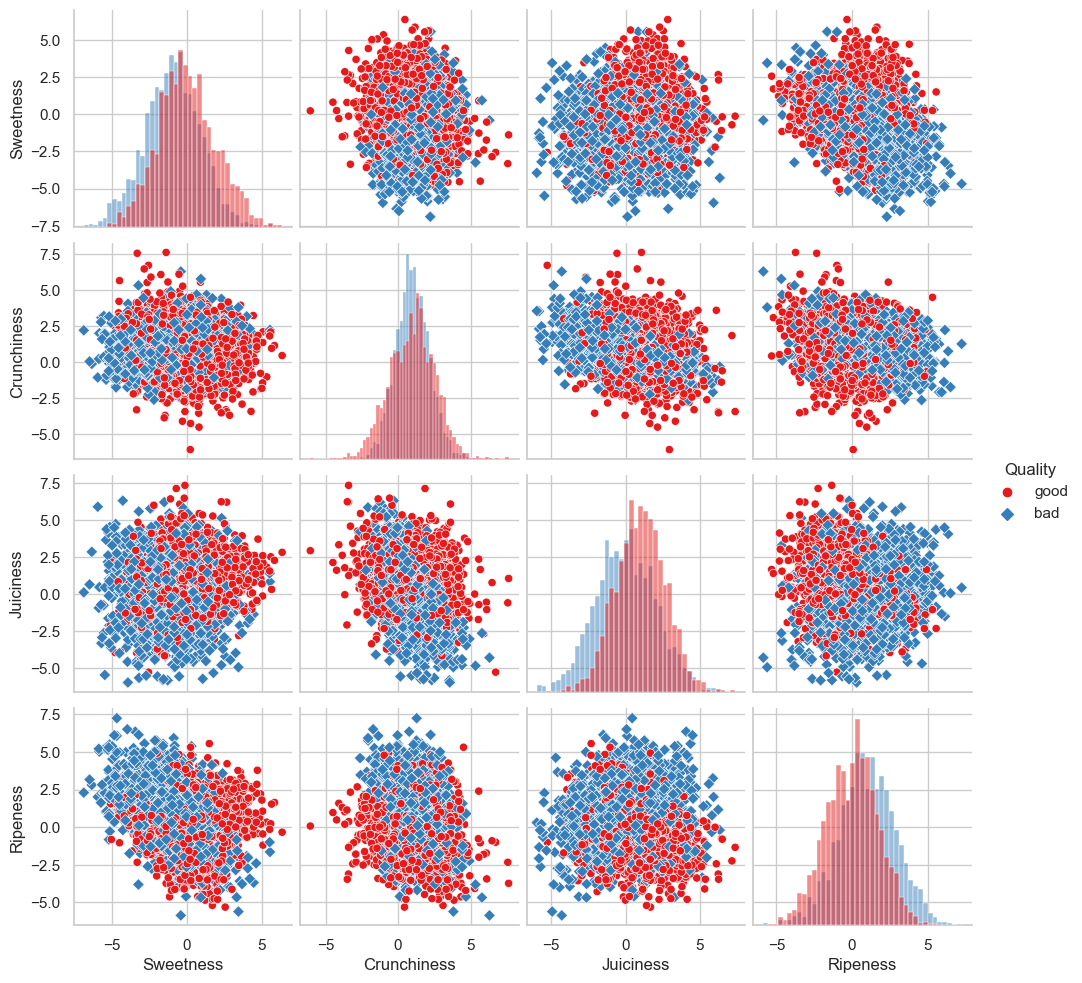

In [50]:
taste_attributes_with_quality = data1[['Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Quality']]

# Set the style of seaborn
sns.set(style="whitegrid")

# Pairplot for the taste attributes, colored by 'Quality'
pairplot = sns.pairplot(taste_attributes_with_quality, hue='Quality', palette='Set1', diag_kind='hist', markers=["o", "D"])

# Display the pairplot
plt.show()


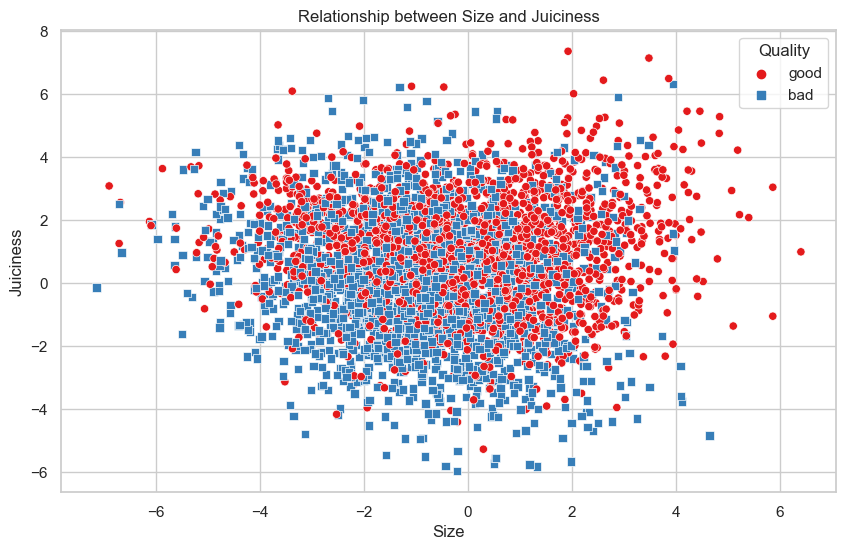

In [51]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.scatterplot(data=data1, x='Size', y='Juiciness', hue='Quality', style='Quality', markers=['o', 's'], palette='Set1')
plt.title('Relationship between Size and Juiciness')  # Add a title to the plot
plt.xlabel('Size')  # Label for the x-axis
plt.ylabel('Juiciness')  # Label for the y-axis
plt.show() 

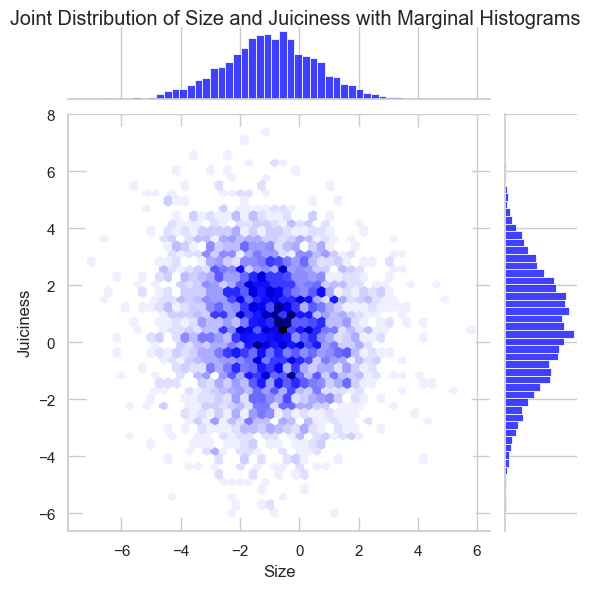

In [58]:
jointplot = sns.jointplot(data=data1, x='Weight', y='Juiciness', kind='hex', color='blue', marginal_kws=dict(bins=50, fill=True))

# Set titles and labels
jointplot.set_axis_labels('Size', 'Juiciness')
jointplot.fig.suptitle('Joint Distribution of Size and Juiciness with Marginal Histograms')
jointplot.fig.subplots_adjust(top=0.95)  # Adjust the title position

plt.show()

### My Learnings ###

#### I have learned how to use different graphs on different data sets. While performing the relationships between the different columns, I found what could be the depend column on other coloumn. I have tried to extract the relationship between different columns to find how the Quality column in the data set is effected from those values.

#### I have followed some tutorial to perform some opeation on datasets which includes data cleaning, data duplication removing, null data from W3 schools["https://www.w3schools.com/python/pandas/pandas_cleaning.asp"]

#### I have explored some new type of styling to represent the graphs, how to declare the parameters in them while using seaborn library especially while using jointplot and scatterplot.